Accuracy: 1.00
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



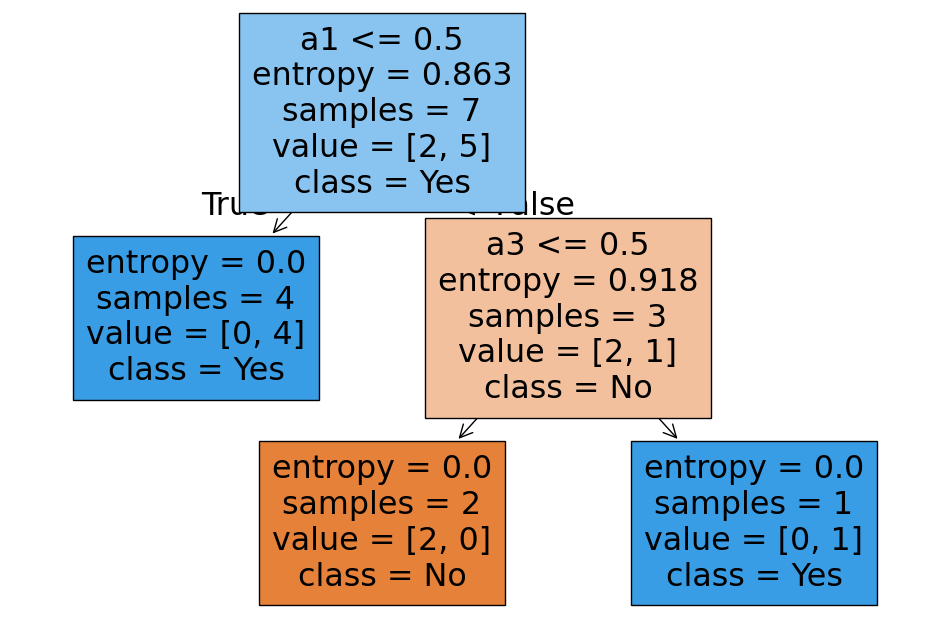

In [1]:
# -*- coding: utf-8 -*-
"""Decision_Tree.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1RXDK8CR1doVCMHgkaXpJsNLAvzOIaXdd
"""

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create the dataset
data = {
    'a1': [True, True, False, False, False, True, True, True, False, False],
    'a2': ['Hot', 'Hot', 'Hot', 'Cool', 'Cool', 'Cool', 'Hot', 'Hot', 'Cool', 'Cool'],
    'a3': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Classification': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}

data

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target
X = df.drop('Classification', axis=1)
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Optionally, visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()



First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset info:
Shape: (150, 5)
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
Species distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Training data shape: (120, 4)
Testing data shape: (30, 4)

Model accuracy: 0.9333

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      

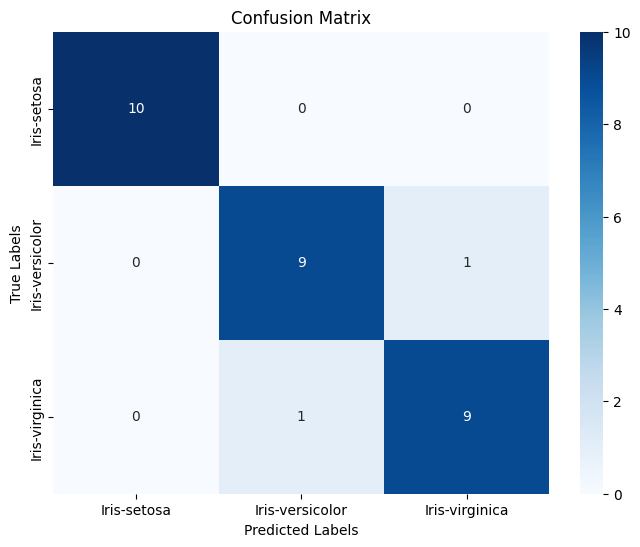


Feature Importance:
        Feature  Importance
2  petal_length    0.558568
3   petal_width    0.406015
1   sepal_width    0.029167
0  sepal_length    0.006250


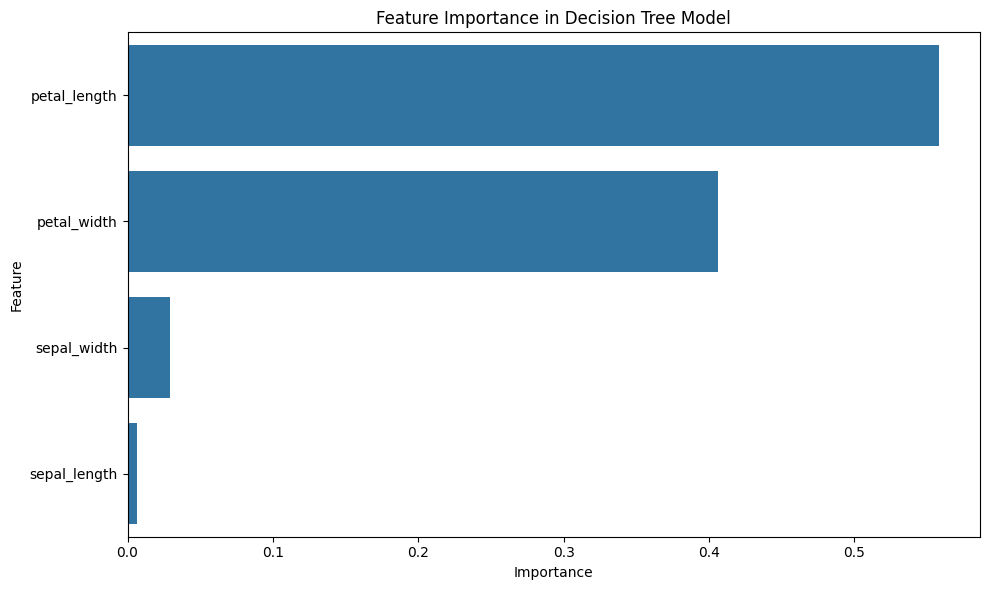

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
iris_data = pd.read_csv('/content/iris.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(iris_data.head())

# Basic information about the dataset
print("\nDataset info:")
print(f"Shape: {iris_data.shape}")
print(f"Features: {iris_data.columns.tolist()}")
print(f"Species distribution:\n{iris_data['species'].value_counts()}")

# Separate features and target
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Create and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel accuracy: {accuracy:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_classifier.classes_,
            yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Decision Tree Model')
plt.tight_layout()
plt.show()

First 5 rows of the dataset:
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

Dataset info:
Shape: (200, 6)
Features: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
Drug distribution:
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

After encoding categorical features:
   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    0   0            0   25.355  drugY
1   47    1   1            0   13.093  drugC
2   47    1   1            0   10.114  drugC
3   28    0   2            0    7.798  drugX
4   61    0   1            0   18.043  drugY

Training data shape: (160, 5)
Testing data shape: (40, 5)

Model accuracy: 0.9750

Confusion Matrix:
[[ 5  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 

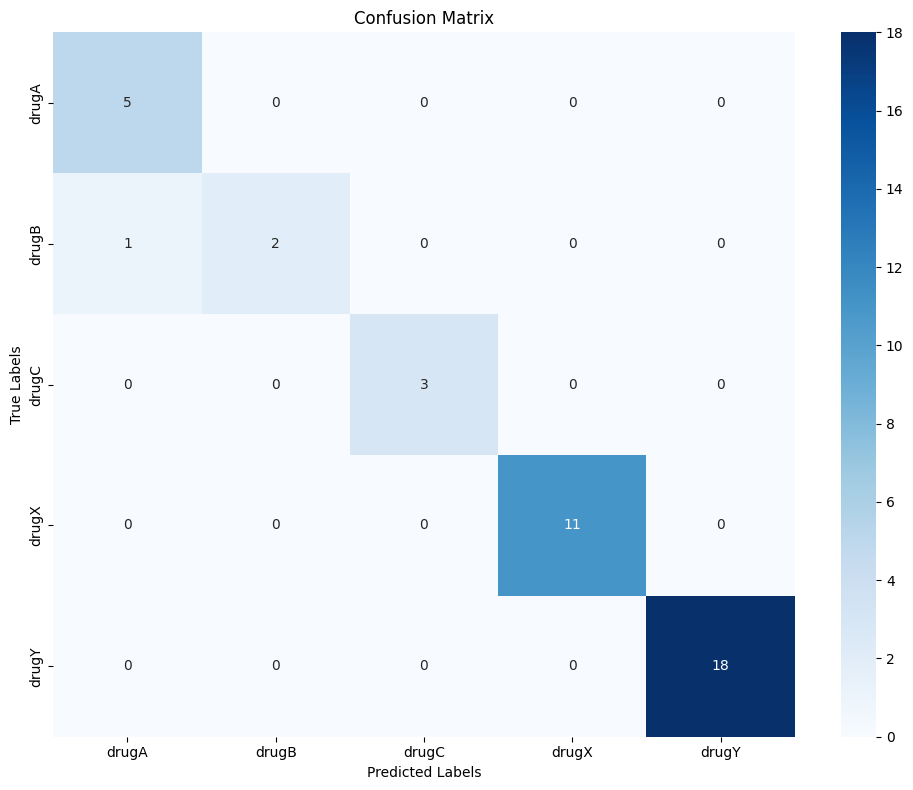


Feature Importance:
       Feature  Importance
4      Na_to_K    0.476235
2           BP    0.270641
0          Age    0.136007
3  Cholesterol    0.117117
1          Sex    0.000000


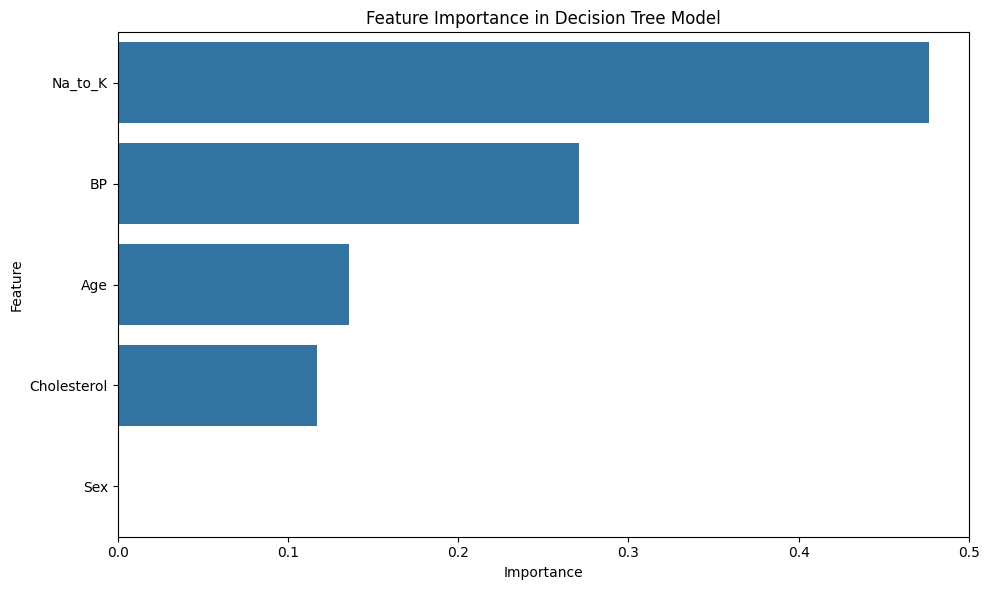


Encoding Mappings:
Sex: {'F': np.int64(0), 'M': np.int64(1)}
BP: {'HIGH': np.int64(0), 'LOW': np.int64(1), 'NORMAL': np.int64(2)}
Cholesterol: {'HIGH': np.int64(0), 'NORMAL': np.int64(1)}


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
drug_data = pd.read_csv('/content/drug.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(drug_data.head())

# Basic information about the dataset
print("\nDataset info:")
print(f"Shape: {drug_data.shape}")
print(f"Features: {drug_data.columns.tolist()}")
print(f"Drug distribution:\n{drug_data['Drug'].value_counts()}")

# Encode categorical features
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_cholesterol = LabelEncoder()

drug_data['Sex'] = le_sex.fit_transform(drug_data['Sex'])
drug_data['BP'] = le_bp.fit_transform(drug_data['BP'])
drug_data['Cholesterol'] = le_cholesterol.fit_transform(drug_data['Cholesterol'])

print("\nAfter encoding categorical features:")
print(drug_data.head())

# Separate features and target
X = drug_data.drop('Drug', axis=1)
y = drug_data['Drug']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Create and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel accuracy: {accuracy:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Decision Tree Model')
plt.tight_layout()
plt.show()

# Print encoding mappings for reference
print("\nEncoding Mappings:")
print(f"Sex: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
print(f"BP: {dict(zip(le_bp.classes_, le_bp.transform(le_bp.classes_)))}")
print(f"Cholesterol: {dict(zip(le_cholesterol.classes_, le_cholesterol.transform(le_cholesterol.classes_)))}")

First 5 rows of the dataset:
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  

Dataset info:
Shape: (48, 5)
Features: ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_Consumption']

Missing values:
Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

Statis

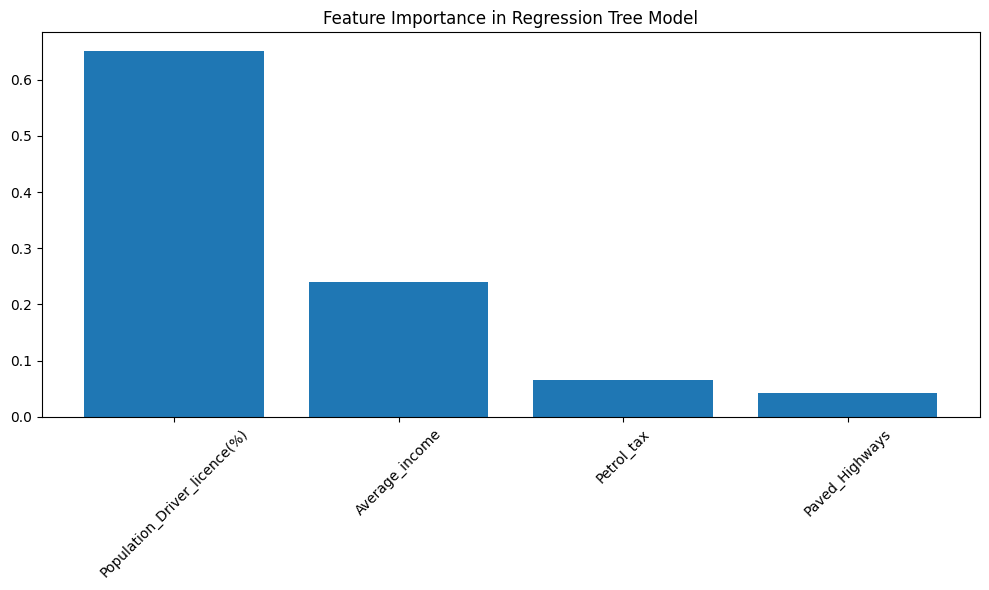

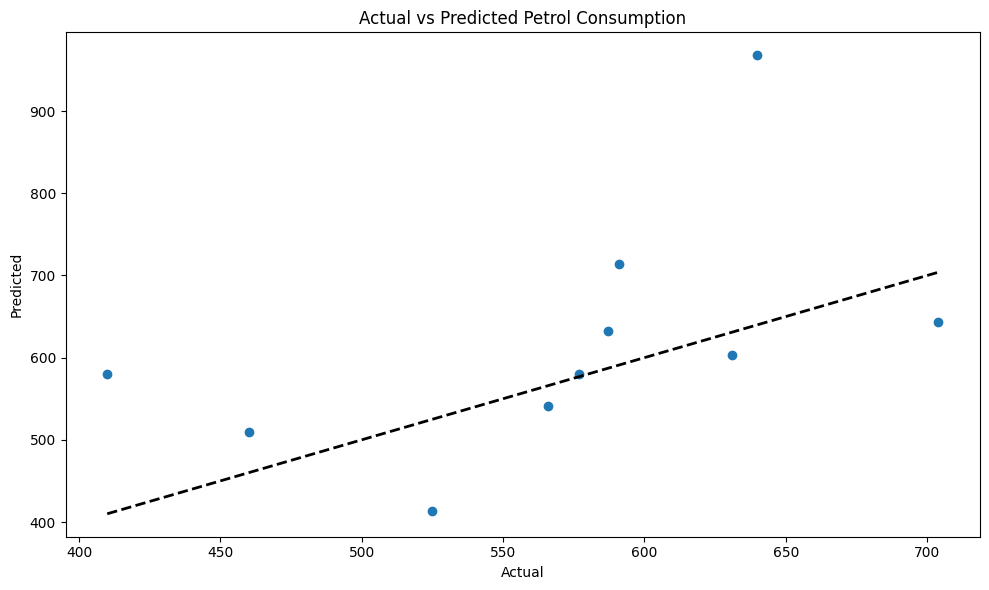

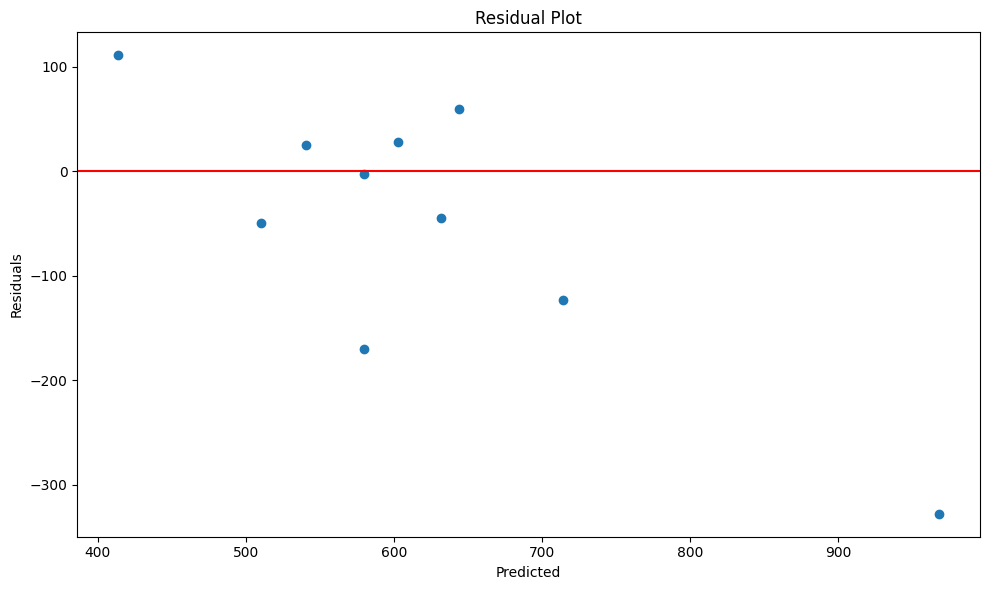

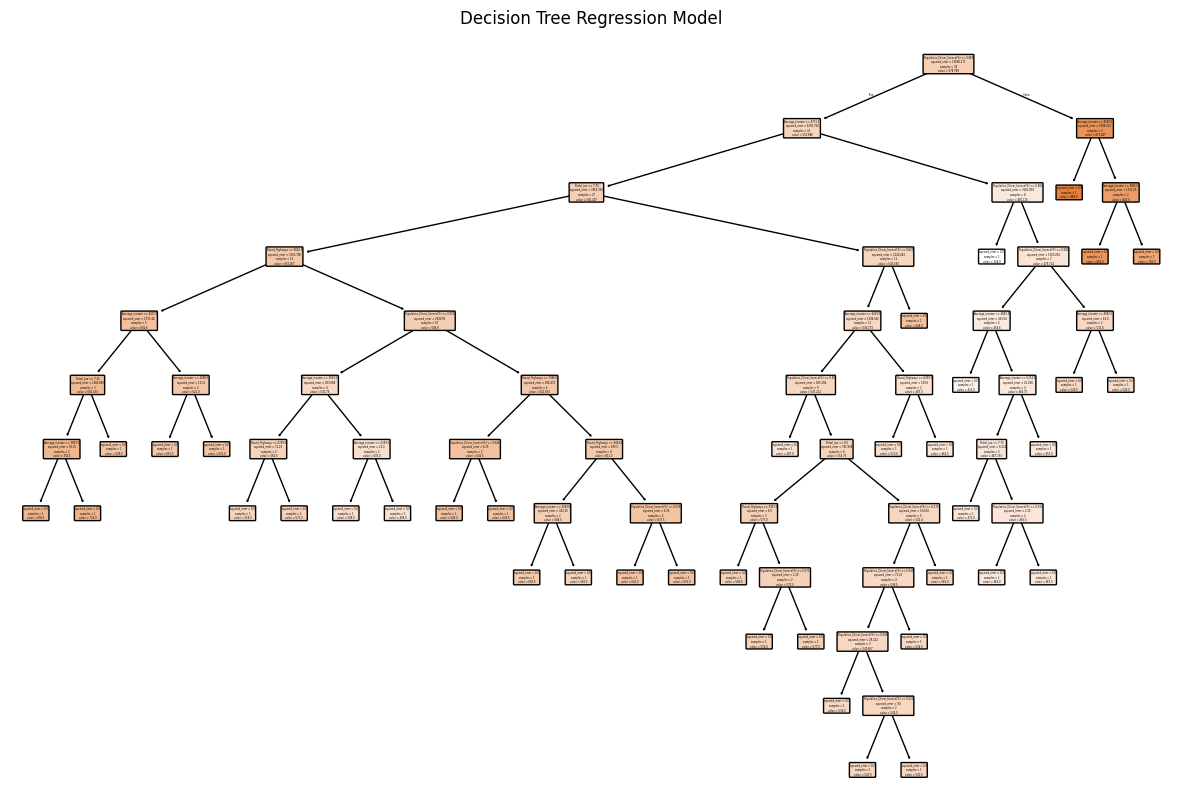

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
petrol_data = pd.read_csv('/content/petrol_consumption.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(petrol_data.head())

# Basic information about the dataset
print("\nDataset info:")
print(f"Shape: {petrol_data.shape}")
print(f"Features: {petrol_data.columns.tolist()}")

# Check for missing values
print("\nMissing values:")
print(petrol_data.isnull().sum())

# Statistical summary
print("\nStatistical summary:")
print(petrol_data.describe())

# Separate features and target
X = petrol_data.drop('Petrol_Consumption', axis=1)
y = petrol_data['Petrol_Consumption']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Create and train the Regression Tree
regression_tree = DecisionTreeRegressor(random_state=42)
regression_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_tree.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': regression_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance in Regression Tree Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Petrol Consumption')
plt.tight_layout()
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()
from sklearn.tree import plot_tree

# Plot the regression tree
plt.figure(figsize=(15, 10))
plot_tree(regression_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Regression Model")
plt.show()
